# Resultados

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

from yaml.loader import SafeLoader

In [2]:
results = {}
with open('results.yaml', 'r') as f:
    data = list(yaml.load_all(f, Loader = SafeLoader))

for d in data:
    for item in d['Results']:
        key = list(item.keys())[0]
        if key not in results and key != 'wordOccurrences': results[key] = list()
        if key not in results and 'loveCount' not in results:
            results['loveCount'] = list()
            results['hateCount'] = list()

        if isinstance(item[key], list):
            results['loveCount'].append(item[key][0]['love'])
            results['hateCount'].append(item[key][1]['hate'])
        else:
            results[key].append(item[key])

data = pd.DataFrame(results)
data

,numThreads,blockLength,preparationTime,searchTime,totalTime,loveCount,hateCount,mostCommonWord
0,1,27614545,0.118360,3.45293,3.57129,10235,850,Love
1,2,13807272,0.094730,3.40451,3.49924,10235,850,Love
2,3,9204848,0.091603,3.41268,3.50429,10235,850,Love
3,4,6903636,0.090479,3.39605,3.48653,10235,850,Love
4,5,5522909,0.090927,3.46586,3.55679,10235,850,Love
...,...,...,...,...,...,...,...,...
95,96,287651,0.090058,3.40175,3.49181,10235,850,Love
96,97,284686,0.091897,3.49299,3.58489,10235,850,Love
97,98,281781,0.097147,3.52748,3.62462,10235,850,Love
98,99,278934,0.106100,3.42241,3.52851,10235,850,Love


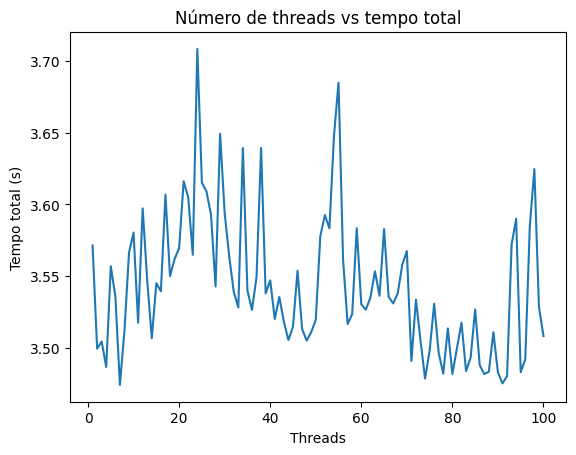

In [3]:
plt.plot(data['numThreads'], data['totalTime'])
plt.title('Número de threads vs tempo total')
plt.xlabel('Threads')
plt.ylabel('Tempo total (s)')
plt.show()

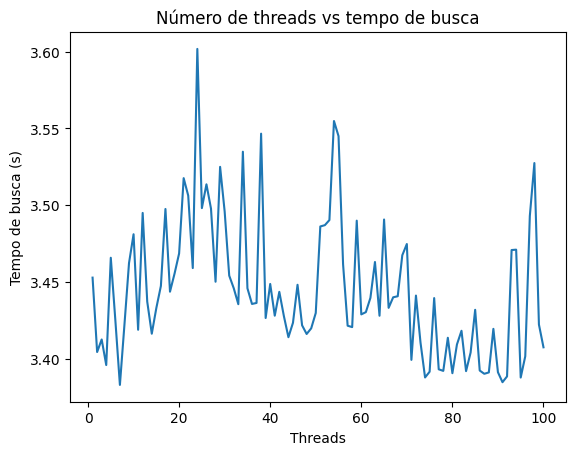

In [4]:
plt.plot(data['numThreads'], data['searchTime'])
plt.title('Número de threads vs tempo de busca')
plt.xlabel('Threads')
plt.ylabel('Tempo de busca (s)')
plt.show()